In [152]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

%matplotlib inline

# **Business Understanding**
Being a football fan, I am interested in exploring the latest FIFA 19 dataset. Thus, I will provide insights into the following questions:

Question 1: Which top 10 Nation has the most number of Soccer Players collected in FIFA 18?

Question 2: How about the age distribution of the FIFA 18 Players?

Question 3: Find out the top 10 clubs with highest total player market value, and the highest average player wage

Question 4: Choose the best squad

Question 5: Correlation between Age, Overall, Potential, Position, Club, Nationality, Special and Value,Wage

Understanding these questions may provide some advice to the Football Club Manager or real Professional football.

# Data Understanding
This project will use FIFA 18 Complete Player Dataset from kaggle. For this project, I will use the CompleteDataset.csv which contains all the information of the Players in FIFA 18.

Below are the steps to look at and understand the dataset.

In [85]:
# reading in the dataset
data = pd.read_csv('./data.csv')

In [5]:
data.shape

(18207, 89)

In [6]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [86]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

# **Data Preparation**
During this step, I will:
*  Drop some columns containing URL and ID column (not needed)
* Check columns for missing values
* Convert string values into numbers for columns Wage and Value
* One-Hot Encode the Categorical Variableslike Club, Nationality and Preferred Positions

In [87]:
# Dropping unused columns
data.drop(['ID', 'Photo', 'Flag', 'Club Logo'], axis=1, inplace = True)
data.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [84]:
data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'G

In [89]:
# checking for missing values in columns
columns_missing_values = set(data.columns[data.isnull().mean() > 0])
print(columns_missing_values)

{'Stamina', 'Preferred Foot', 'LCM', 'LWB', 'RDM', 'RM', 'LDM', 'Volleys', 'Strength', 'LCB', 'GKHandling', 'Marking', 'Penalties', 'GKKicking', 'CDM', 'Dribbling', 'Jumping', 'LB', 'LF', 'Crossing', 'RCB', 'RF', 'LS', 'CAM', 'RCM', 'ShotPower', 'LW', 'BallControl', 'Aggression', 'StandingTackle', 'CM', 'LM', 'RWB', 'CF', 'International Reputation', 'GKReflexes', 'Work Rate', 'Position', 'RW', 'Weight', 'LongPassing', 'GKPositioning', 'Height', 'HeadingAccuracy', 'LAM', 'RAM', 'Composure', 'GKDiving', 'Club', 'RB', 'Acceleration', 'Interceptions', 'Positioning', 'SprintSpeed', 'FKAccuracy', 'Agility', 'Release Clause', 'Body Type', 'RS', 'Real Face', 'Curve', 'Weak Foot', 'CB', 'Finishing', 'Reactions', 'Balance', 'Jersey Number', 'ShortPassing', 'LongShots', 'Contract Valid Until', 'Vision', 'ST', 'SlidingTackle', 'Joined', 'Loaned From', 'Skill Moves'}


Luckily most of these columns with missing values are ratings at all positions. These missing values are reasonable as a Goal Keeper may not have the position rating on other positions beside GK. These columns are not used in my questions, except Club. However for Club, a player with missing value in 'Club', the most possible explanation is that this player doesn't belong to any club for the moment, which means he is still available on free transfer. Any club interested in him may sign this player without paying any transfer fee (The player's market value)

In [91]:
data.Position.value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [92]:
# Defining functions that converts strings to number
def convert_stringtonumber(price):
    """
    This function converts from price values in string type to float type numbers
    
    Parameter:
    price(str): Price values in string type with M & K as abbreviation for Million and Thousands respectively
    
    Returns:
    float: A float number represents the numerical value of the input parameter price(str)
    """
    
    if price[-1] == 'K':
        return int(price[1:-1])*1000
    elif price[-1] == 'M':
        return float(price[1:-1])*1000000
    else:
        return float(price[1:])

In [93]:
# creating another columns for the engineeered columns and converting the strings to number
data['Value_num'] = data['Value'].apply(convert_stringtonumber)
data['Wage_num'] = data['Wage'].map(lambda x: convert_stringtonumber(x))
#data['Release_Clause_num'] = data['Release Clause'].map(lambda x: convert_stringtonumber(x))

data.drop(['Value', 'Wage'],axis =1)

data.Wage_num.head()


0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage_num, dtype: float64

In [54]:
data.Value_num.head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value_num, dtype: float64

In [94]:
# selecting columns with categorical columns
data_cat = data.select_dtypes(include = ['object'])
data_cat_col = data_cat.columns
print(data_cat)

                       Name          Nationality                    Club  \
0                  L. Messi            Argentina            FC Barcelona   
1         Cristiano Ronaldo             Portugal                Juventus   
2                 Neymar Jr               Brazil     Paris Saint-Germain   
3                    De Gea                Spain       Manchester United   
4              K. De Bruyne              Belgium         Manchester City   
5                 E. Hazard              Belgium                 Chelsea   
6                 L. Modrić              Croatia             Real Madrid   
7                 L. Suárez              Uruguay            FC Barcelona   
8              Sergio Ramos                Spain             Real Madrid   
9                  J. Oblak             Slovenia         Atlético Madrid   
10           R. Lewandowski               Poland       FC Bayern München   
11                 T. Kroos              Germany             Real Madrid   
12          

In [65]:
for col in data_cat.columns:
    print(col.value_counts())

AttributeError: 'str' object has no attribute 'value_counts'

In [100]:
# Data Preparation before One-Hot Encoding for Preferred Positions
# Selecting only one preferred position (first one) and stored in New 'Preferred Position' column
#data['Preferred Position'] = data['Preferred Positions'].str.split().str[0]

# Onehotencoding 4 most important Categorical variables - Club, Nationality, Preferred Positions
#he = OneHotEncoder()
le = LabelEncoder()

data['Club_le']               = le.fit_transform(data['Club'].astype(str))
data['Nationality_le']        = le.fit_transform(data['Nationality'].astype(str))
data['Position_le'] = le.fit_transform(data['Position'].astype(str))

In [98]:
data.Position.value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [96]:
data[['Club_le', 'Nationality_le', 'Position_le']]

,Club_le,Nationality_le,Position_le
0,212,6,21
1,326,123,26
2,435,20,14
3,375,139,5
4,374,13,19
5,134,13,11
6,470,35,19
7,212,158,23
8,470,139,18
9,61,136,5


# **Answering Questions Using Data Insights**

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


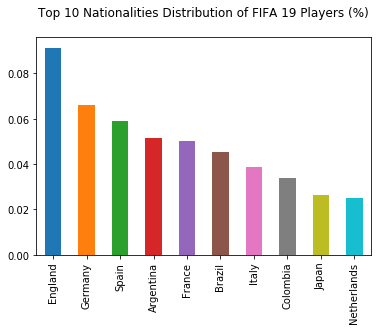

In [135]:
# Question 1: Which Nation has most number of Soccer Players collected in FIFA 18, list the top 10 Nations
nationality_levels = data.Nationality.value_counts()
print(nationality_levels.head())
# visualising 
(nationality_levels[:10]/len(data)).plot.bar();
plt.title("Top 10 Nationalities Distribution of FIFA 19 Players (%)\n");

The result shows England, Germany, Spain have most players in FIFA 18. This is reasonable since Barclays Premier League, Bundesliga, La Liga and Ligue 1 are 4 of the best  Football Leagues in Europe and in the world. Furthermore, these leagues embrace football development like using VAR that could improve the referee's decision making on the field. Thus, it attracts many upcoming stars across the world willing to become a world football star. Although, The Agentina and Brazil leageues are not among the top leages, they rank 4th & 6th. This explains  why they have the greatest number of gifted football players in the world. Italy ranks as 7th since Lega Serie A is also one of the top 5 popular football league in Europe. These top 7 nations have the most famous football players that collected in FIFA 19 dataset.

21    1423
26    1387
24    1358
22    1340
23    1332
Name: Age, dtype: int64


Text(0.5, 1.0, 'Age Distribution of FIFA 19 Players (%)\n')

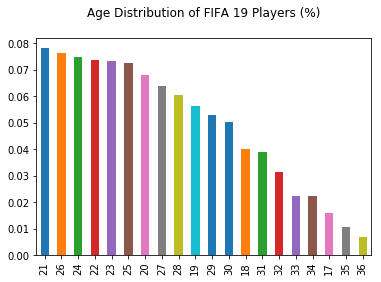

In [136]:
# Question 2: How about the age distribution of the FIFA 18 Players?
Age_level = data['Age'].value_counts()
print(Age_level.head())
(Age_level.head(20)/len(data)).plot('bar')
plt.title("Age Distribution of FIFA 19 Players (%)\n")

The age distribution clearly show that most players are between 21–26 years old. This is justified as  the best  athletes are produced at this age range. Players younger than this range may not have the enough skills, experiences and chance to prove themselves on the football field yet. Players older than 30 may be depreciating or already retired from the football. Thus the number for players older than 30 drops with the growth of age.

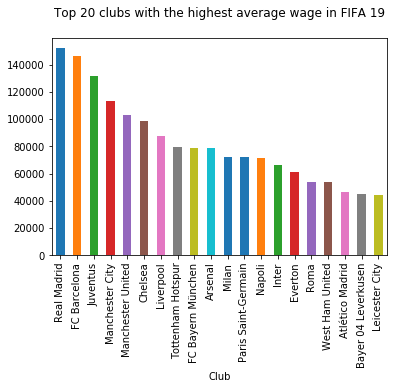

In [137]:
# Question 3: Find out the top 10 clubs with highest total player market value, and the highest average player wage
data.groupby('Club').mean()['Wage_num'].sort_values(ascending = False).head(10)
data.groupby('Club').mean()['Wage_num'].sort_values(ascending = False)[:20].plot.bar()
plt.title("Top 20 clubs with the highest average wage in FIFA 19\n");

Real Madrid CF, FC Barcelona and Juventus football players earn highest compared to other players of other clubs. This high wages help to attract the most valuable players to play for the clubs.

In [ ]:
# Question 4: Choose the best squad 
# The most important columns to choose the best squad are 'Name', 'Age', 'Overall', 'Potential', 'Position'

In [167]:
data_best_squad = data[['Name', 'Age', 'Overall', 'Potential', 'Position']]
data_best_squad.head()

,Name,Age,Overall,Potential,Position
0,L. Messi,31,94,94,RF
1,Cristiano Ronaldo,33,94,94,ST
2,Neymar Jr,26,92,93,LW
3,De Gea,27,91,93,GK
4,K. De Bruyne,27,91,92,RCM


Similar as the video game Football Manager, FIFA 19 also includes a game mode to ask gamer to play as a role of a football manager. For example, in FIFA Ultimate Team Mode, the gamer needs to choose their team squad and try to collect the best players to win the matches. Hence it will be useful to choose the best squad base on the player Overall value.

The idea is to select the highest Overall Value for each position. As there may be several Positions, so it’s necessary to convert Preferred Positions to Preferred Position, assuming that the first position is the most preferred position of that player. The next is to select the player with the highest overall value for each position. I chose the best squad for two formations, Formation 4–3–3 and Formation 3–4–1–2.

In [161]:
position

NameError: name 'position' is not defined

In [164]:
data['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [162]:
def best_squad(position):
    """
    This function perform selection of the player with highest Overall Value for each provided position
    
    Parameter:
    position(str): a particular position of a certain footbal formation
    
    Returns:
    Position: The position from Input Parameter
    Player:   The Best Player Name for this Position
    Overall:  The Overall Value for this Best Player
    """
    data_copy = data.copy()
    BestSquad = []
    for i in position:
        BestSquad.append([i,data_copy.loc[[data_copy[data_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), data_copy[data_copy['Position'] == i]['Overall'].max()])
        #  BestSquad.append(max overall name, max overall 
        data_copy.drop(data_copy[data_copy['Position'] == i]['Overall'].idxmax(), inplace = True)

    return pd.DataFrame(np.array(BestSquad).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

In [165]:
# Formation 433
squad_Formation433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
print ('Best Squad of Formation 4-3-3')
print (best_squad(squad_Formation433))

Best Squad of Formation 4-3-3
Position             Player Overall
     GK             De Gea      91
     LB            Marcelo      88
     CB           D. Godín      90
     CB          S. Umtiti      87
     RB        Azpilicueta      86
     LM      P. Aubameyang      88
    CDM    Sergio Busquets      89
     RM          K. Mbappé      88
     LW          Neymar Jr      92
     ST  Cristiano Ronaldo      94
     RW     Bernardo Silva      86


In [166]:
# Formation 3412
squad_Formation3412 = ['GK', 'CB', 'CB', 'CB', 'LM', 'CM', 'CM', 'RM', 'CAM', 'ST', 'ST']
print ('Best Squad of Formation 3-4-1-2')
print (best_squad(squad_Formation3412))

Best Squad of Formation 3-4-1-2
Position               Player Overall
     GK               De Gea      91
     CB             D. Godín      90
     CB            S. Umtiti      87
     CB           M. Benatia      86
     LM        P. Aubameyang      88
     CM               Thiago      86
     CM  S. Milinković-Savić      85
     RM            K. Mbappé      88
    CAM         A. Griezmann      89
     ST    Cristiano Ronaldo      94
     ST       R. Lewandowski      90


In [150]:
# Question 5: Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage
data_correlation = data[['Name', 'Age', 'Overall', 'Potential', 'Position_le', 'Club_le', 'Nationality_le', 'Special', 'Value_num', 'Wage_num']].corr()

data_correlation

,Age,Overall,Potential,Position_le,Club_le,Nationality_le,Special,Value_num,Wage_num
Age,1.000000,0.452350,-0.253312,-0.001042,0.001995,-0.030824,0.236695,0.075022,0.141145
Overall,0.452350,1.000000,0.660939,0.063312,0.004888,-0.011851,0.606960,0.627085,0.571926
Potential,-0.253312,0.660939,1.000000,0.024432,-0.009493,0.007352,0.383727,0.576218,0.486413
Position_le,-0.001042,0.063312,0.024432,1.000000,0.003737,-0.007693,0.201667,0.047040,0.041511
Club_le,0.001995,0.004888,-0.009493,0.003737,1.000000,0.008392,0.001655,-0.001411,-0.019516
Nationality_le,-0.030824,-0.011851,0.007352,-0.007693,0.008392,1.000000,-0.005249,-0.009965,-0.020944
Special,0.236695,0.606960,0.383727,0.201667,0.001655,-0.005249,1.000000,0.377738,0.347835
Value_num,0.075022,0.627085,0.576218,0.047040,-0.001411,-0.009965,0.377738,1.000000,0.858442
Wage_num,0.141145,0.571926,0.486413,0.041511,-0.019516,-0.020944,0.347835,0.858442,1.000000


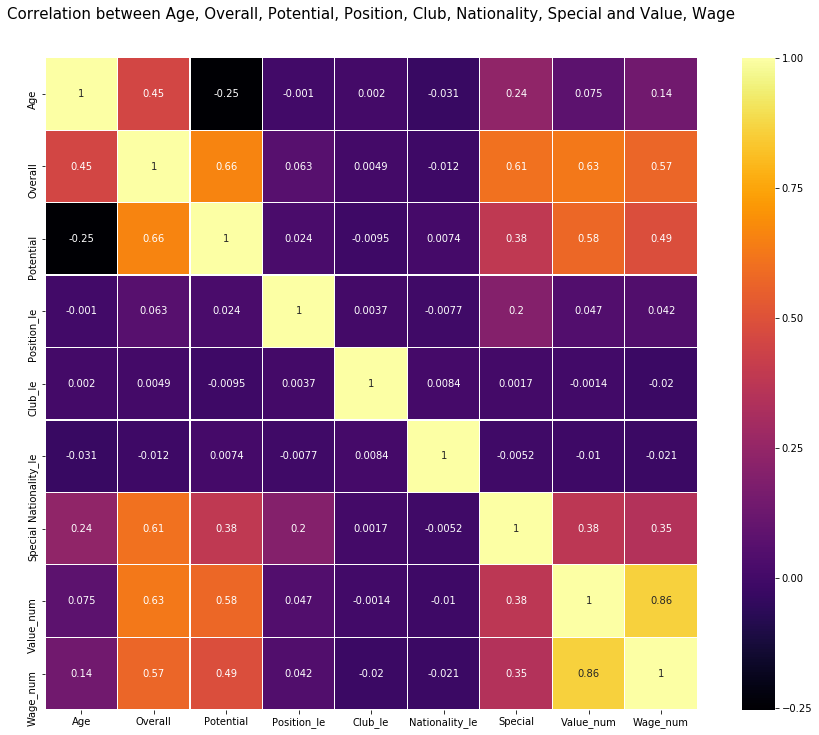

In [160]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between Age, Overall, Potential, Position, Club, Nationality, Special and Value, Wage', y=1.05, size=15)
sns.heatmap(data_correlation,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

The correlation heatmap above shows the highest positive correlation between Value and Wage of players indicating that the higher the player's Value, the greater will be his Wage. This is followed by Overall and Potential. Thus, we can say that Overall & Potential are positively related to Wage & Value. Special als have positive correlation with Wage & Value. However, Club, Nationality and Position are not so important features that relate to Wage & Value. 